In [9]:
%pylab inline
from threeML import *

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
triggerName = 'bn090217206'
ra = 204.9
dec = -8.4

#Data are in the current directory

datadir = os.path.abspath('.')


#The .pha, .bak and .rsp files have been prepared with the Fermi
#official software. In the future it will be possible to create
#them directly from the plugin

#Create an instance of the GBM plugin for each detector
#Data files
obsSpectrum = os.path.join( datadir, "bn090217206_n6_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_n6_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_n6_weightedrsp.rsp{1}" )

#Plugin instance
NaI6 = FermiGBMLike( "NaI6", obsSpectrum, bakSpectrum, rspFile )

#Choose energies to use (in this case, I exclude the energy
#range from 30 to 40 keV to avoid the k-edge, as well as anything above
#950 keV, where the calibration is uncertain)
NaI6.set_active_measurements( "10.0-30.0", "40.0-950.0" )

#Now repeat for the other GBM detectors

obsSpectrum = os.path.join( datadir, "bn090217206_n9_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_n9_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_n9_weightedrsp.rsp{1}" )
#Plugin instance
NaI9 = FermiGBMLike( "NaI9", obsSpectrum, bakSpectrum, rspFile )
#Choose chanels to use
NaI9.set_active_measurements( "10.0-30.0", "40.0-950.0" )


obsSpectrum = os.path.join( datadir, "bn090217206_b1_srcspectra.pha{1}" )
bakSpectrum = os.path.join( datadir, "bn090217206_b1_bkgspectra.bak{1}" )
rspFile     = os.path.join( datadir, "bn090217206_b1_weightedrsp.rsp{1}" )
#Plugin instance
BGO1 = FermiGBMLike( "BGO1", obsSpectrum, bakSpectrum, rspFile )
#Choose chanels to use (in this case, from 200 keV to 10 MeV)
BGO1.set_active_measurements( "200-10000" )


data_list = DataList( NaI6, NaI9, BGO1 )

Now using 117 channels out of 128
Now using 115 channels out of 128
Now using 88 channels out of 128


In [37]:
#Let's use a Band model, a phenomenological model typically used for GRBs
bb = Blackbody()

pl  = Powerlaw()

comp_model = bb+pl







In [38]:
GRB = PointSource( triggerName, ra, dec, spectral_shape=comp_model )

model = Model( GRB )

jl = JointLikelihood( model, data_list )

res = jl.fit()

Best fit values:



#,Name,Best fit value,Unit
0,bn090217206.spectrum.main.composite.K_1,(1.55 +/- 0.34)e-06,1 / (cm2 keV3 s)
1,bn090217206.spectrum.main.composite.kT_1,80 +/- 6,keV
2,bn090217206.spectrum.main.composite.K_2,6.3 +/- 0.4,1 / (cm2 keV s)
3,bn090217206.spectrum.main.composite.index_2,-1.486 +/- 0.016,



NOTE: errors on parameters are approximate. Use get_errors().

Nuisance parameters:



Name,Value,Unit
InterCalib_of_NaI6,1,
InterCalib_of_NaI9,1,
InterCalib_of_BGO1,1,



Correlation matrix:



1.00,-0.99,-0.72,0.63
-0.99,1.00,0.73,-0.69
-0.72,0.73,1.00,-0.91
0.63,-0.69,-0.91,1.00



Values of -log(likelihood) at the minimum:



,instrument,-log(likelihood)
0,all,2244.517007
1,NaI6,854.486272
2,NaI9,766.816085
3,BGO1,623.214650


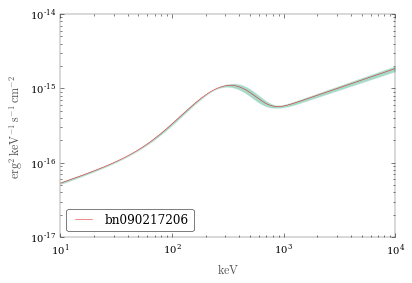

In [39]:
spec_plot_mle = SpectralPlotter(jl)
spec_plot_mle.plot_model(x_unit='keV',
                         y_unit='erg2/(cm2 keV s)',
                         ene_min=10.,
                         ene_max=1E4,
                         loc='lower left',
                         lw=.5,
                         ls='-')

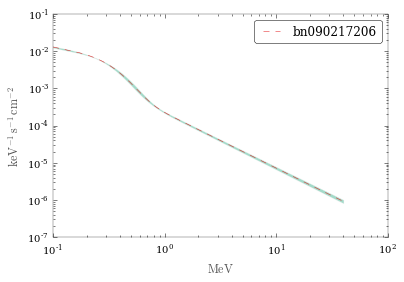

In [41]:

spec_plot_mle.plot_model(x_unit='MeV',
                         y_unit='1/(cm2 keV s)',
                         ene_min=1.E-1,
                         ene_max=4E1,
                         loc='upper right',
                         lw=.5,
                         ls='--')

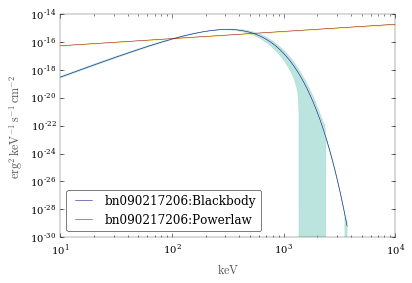

In [42]:
fit_cmap = plt.cm.jet
contour_cmap = plt.cm.Set3

spec_plot_mle.plot_components(x_unit='keV',
                         y_unit='erg2/(cm2 keV s)',
                         ene_min=10,
                         ene_max=1E4,
                         loc='lower left',
                         lw=.5,
                         ls='-',
                         fit_cmap=fit_cmap,
                         contour_cmap=contour_cmap,
                         contour_alpha=.6  )

In [49]:
comp_model.K_1.prior = Log_uniform_prior(lower_bound = 1E-7, upper_bound = 1E-5)
comp_model.K_2.prior = Log_uniform_prior(lower_bound =1E-1,upper_bound = 1E2)
comp_model.index_2.prior = Uniform_prior(lower_bound =-3,upper_bound = 3)
comp_model.kT_1.prior = Log_uniform_prior(lower_bound =1E1,upper_bound = 1E4)

bayes = BayesianAnalysis(model, data_list)

res= bayes.sample(100,100,500)


Running burn-in of 100 samples...

 [*********************100%***********************]  completed in 11.7 s

Sampling...

 [**********************99%***********************]  497 / 500 in 55.6 s (0:00:00 remaining)
Mean acceptance fraction: 0.5818


OrderedDict([('bn090217206.spectrum.main.composite.K_1',
              array([  1.44518168e-06,   1.44518168e-06,   1.48216191e-06, ...,
                       1.57960896e-06,   1.57960896e-06,   1.57960896e-06])),
             ('bn090217206.spectrum.main.composite.kT_1',
              array([ 80.00706193,  80.00706193,  79.96531886, ...,  80.59353867,
                      80.59353867,  80.59353867])),
             ('bn090217206.spectrum.main.composite.K_2',
              array([ 6.68711158,  6.68711158,  6.59484287, ...,  7.46564542,
                      7.46564542,  7.46564542])),
             ('bn090217206.spectrum.main.composite.index_2',
              array([-1.47993586, -1.47993586, -1.48221704, ..., -1.53113422,
                     -1.53113422, -1.53113422]))])

In [50]:
bayes_plot = SpectralPlotter(bayes)

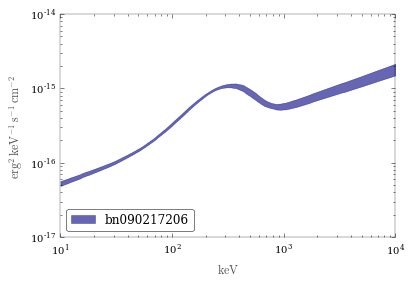

In [51]:
bayes_plot.plot_model(x_unit='keV',
                         y_unit='erg2/(cm2 keV s)',
                         ene_min=10,
                         ene_max=1E4,
                         loc='lower left',
                         lw=.5,
                         ls='-',
                         fit_cmap=fit_cmap,
                         contour_cmap=contour_cmap,
                         contour_alpha=.6)

(1e-23, 1e-14)

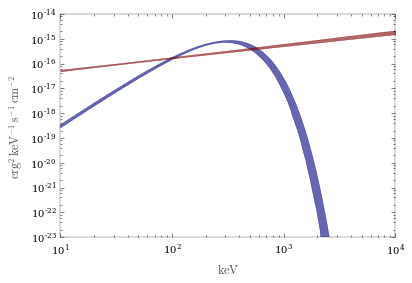

In [55]:
bayes_plot.plot_components(x_unit='keV',
                           y_unit='erg2/(cm2 keV s)',
                           ene_min=10,
                           ene_max=1E4,
                           lw=.5,
                           ls='-',
                           fit_cmap=fit_cmap,
                           contour_alpha=.6,
                           legend=False,
                           thin=10)
ylim(1E-23)